In [ ]:
# !pip install statsmodels

In [1]:
from statsmodels.tsa import arima_process
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (15, 6)  # overwrite the default figure size
plt.rcParams['axes.grid'] = True          # add the grid lines by default

# AR(1) process

The class `ArmaProcess` lets us simulate ARIMA processes.

*Note*: Both the `AR` and `MA` components must include the coefficient on the zero-lag. In almost all cases these values should be 1. Further, due to using the lag-polynomial representation, the `AR` parameters should have the opposite sign of what one would write in the ARMA representation. see [docs](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html) for more info.

In [3]:
ar_coeff = 0.75 
arma_process = arima_process.ArmaProcess(ar=[1, -ar_coeff])

np.random.seed(0)
x = pd.Series(arma_process.generate_sample(100))

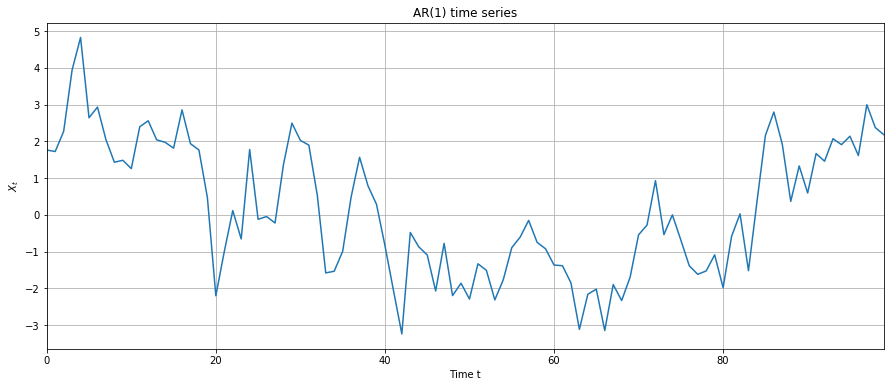

In [4]:
ax = x.plot(title="AR(1) time series")
ax.set_xlabel("Time t")
ax.set_ylabel('$X_t$'); 

The autocorrelation function of an MA(1) drops to 0 after lag 1.

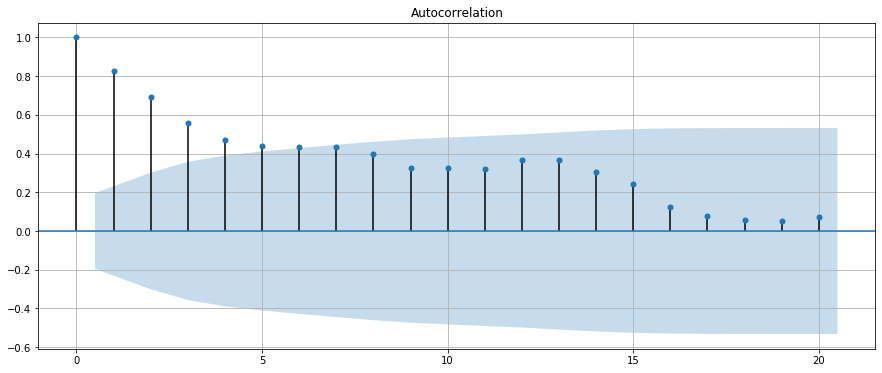

In [5]:
tsaplots.plot_acf(x);

The partial autocorrelation function of an AR(1) process exponentially decays to zero after lag 1.

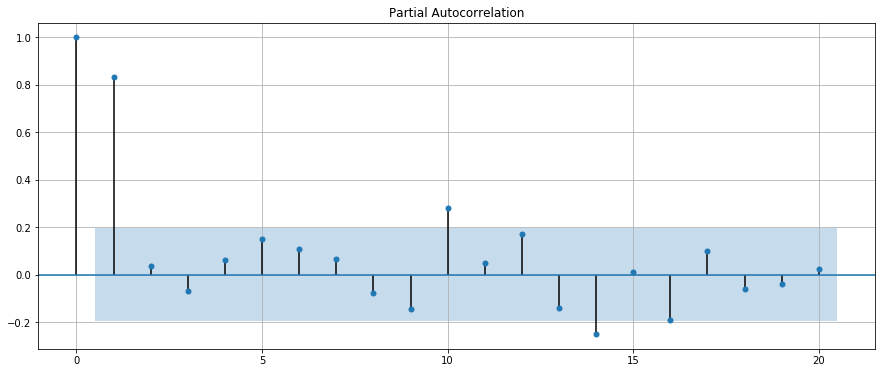

In [6]:
tsaplots.plot_pacf(x);

# MA(1) process

In [7]:
ma_coeff = 1
arma_process = arima_process.ArmaProcess(ma=[1, ma_coeff])

np.random.seed(0)
x = pd.Series(arma_process.generate_sample(100))

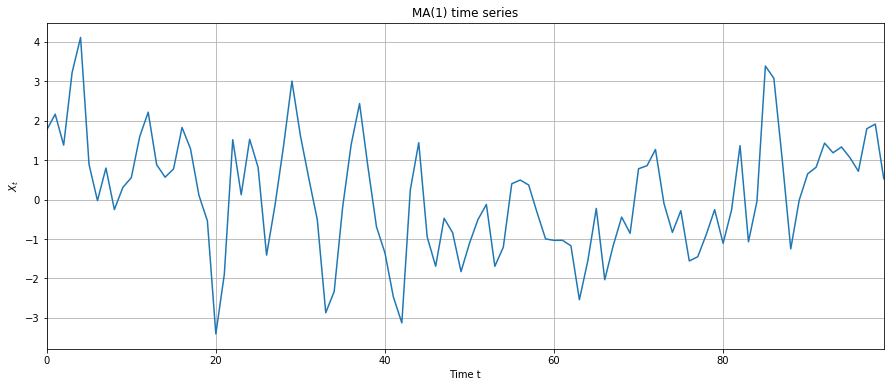

In [8]:
ax = x.plot(title="MA(1) time series")
ax.set_xlabel("Time t")
ax.set_ylabel('$X_t$'); 

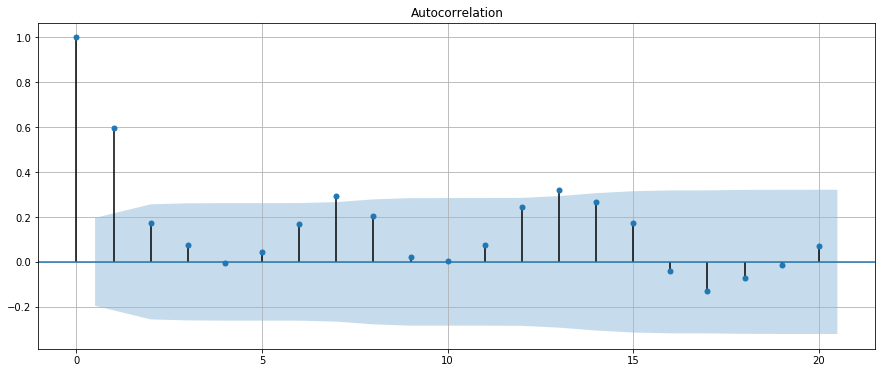

In [9]:
tsaplots.plot_acf(x);

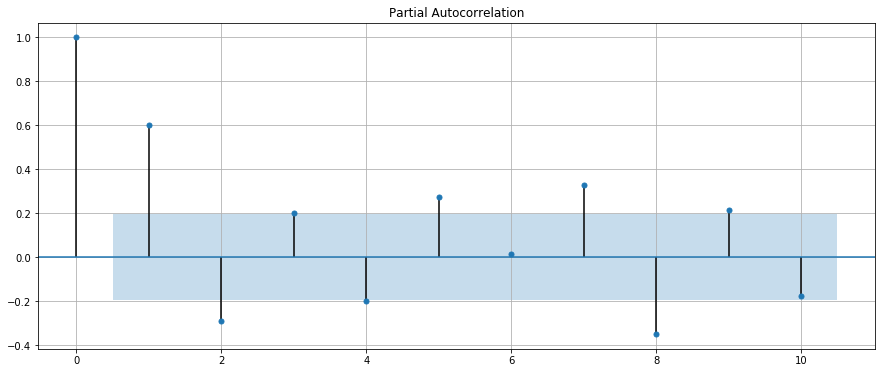

In [17]:
tsaplots.plot_pacf(x, lags=10);

# Code used for the simulation

In [18]:
t = np.linspace(1, 100, 100)/10
arma_process = arima_process.ArmaProcess(ma=[1, 1])

np.random.seed(0)
x = pd.Series(arma_process.generate_sample(100)) + t

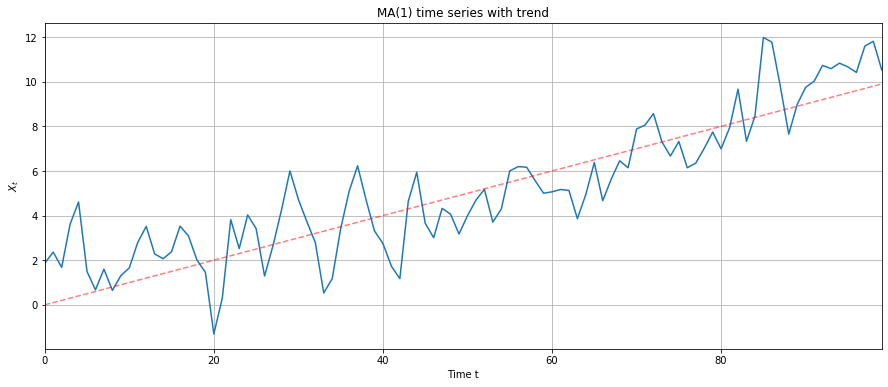

In [19]:
ax = x.plot(title="MA(1) time series with trend")
ax.set_xlabel("Time t")
ax.set_ylabel('$X_t$')

line_vals = np.array(ax.get_xlim())
ax.plot(line_vals, .1*line_vals, 'r--', alpha=0.5); 

In [20]:
np.random.seed(0)
x = pd.Series(arma_process.generate_sample(100)) + t + 3*np.sin(t/3*2*np.pi) + 2*np.cos(t/3*2*np.pi)

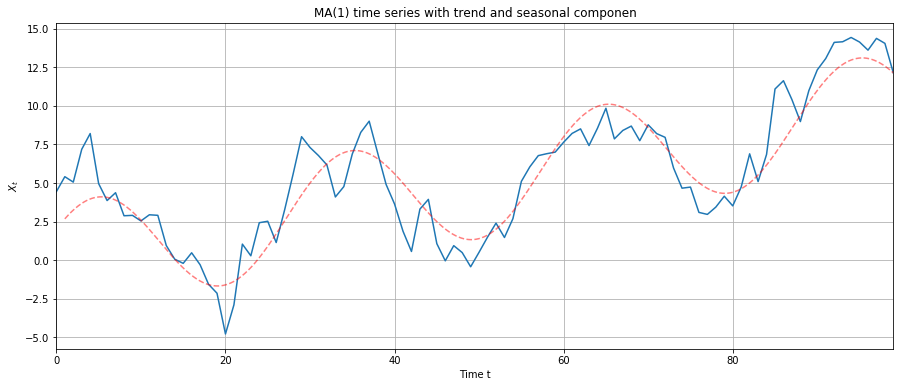

In [21]:
ax = x.plot(title="MA(1) time series with trend and seasonal componen")
ax.set_xlabel("Time t")
ax.set_ylabel('$X_t$')

line_x_vals = np.linspace(1, 100, 1000)
line_y_vals = line_x_vals/10 + 3*np.sin(line_x_vals/30*2*np.pi) + 2*np.cos(line_x_vals/30*2*np.pi)
ax.plot(line_x_vals, line_y_vals, 'r--', alpha=0.5); 